In [3]:
!pip install pyspark

!apt-get install openjdk-8-jdk-headless -qq > /dev/null

!wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz

!tar xf spark-3.2.1-bin-hadoop2.7.tgz

!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"

import findspark

findspark.init()

import pyspark

     |████████████████████████████████| 281.4 MB 32 kB/s 
     |████████████████████████████████| 198 kB 41.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=883ce8bf37389dd3e5b7f16d511f2e477ca1a6ce692eaf181aa0ffe63131b621
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [5]:
### Initialize the spark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [6]:
import pyspark.ml as ml

In [7]:
employees_df  = spark.read.csv('employees.csv',inferSchema=True,header=True)

In [5]:
employees_df.show(5, truncate=False)


+------+------------+----------+----------+---------+---+----------+--------------+-----------------------+----+---------+
|emp_no|emp_title_id|birth_date|first_name|last_name|sex|hire_date |no_of_projects|Last_performance_rating|left|last_date|
+------+------------+----------+----------+---------+---+----------+--------------+-----------------------+----+---------+
|473302|s0001       |7/25/1953 |Hideyuki  |Zallocco |M  |4/28/1990 |2             |A                      |0   |null     |
|475053|e0002       |11/18/1954|Byong     |Delgrande|F  |9/7/1991  |1             |C                      |0   |null     |
|57444 |e0002       |1/30/1958 |Berry     |Babb     |F  |3/21/1992 |9             |A                      |0   |null     |
|421786|s0001       |9/28/1957 |Xiong     |Verhoeff |M  |11/26/1987|2             |C                      |0   |null     |
|282238|e0003       |10/28/1952|Abdelkader|Baumann  |F  |1/18/1991 |6             |B                      |0   |null     |
+------+--------

In [8]:
dept_df  = spark.read.csv('departments.csv',inferSchema=True,header=True)

In [9]:
dept_df.show(5, truncate=False)

+-------+---------------+
|dept_no|dept_name      |
+-------+---------------+
|d001   |Marketing      |
|d002   |Finance        |
|d003   |Human Resources|
|d004   |Production     |
|d005   |development    |
+-------+---------------+
only showing top 5 rows



In [11]:
dept_emp_df  = spark.read.csv('dept_emp.csv',inferSchema=True,header=True)
dept_emp_df.show(5, truncate=False)


+------+-------+
|emp_no|dept_no|
+------+-------+
|10001 |d005   |
|10002 |d007   |
|10003 |d004   |
|10004 |d004   |
|10005 |d003   |
+------+-------+
only showing top 5 rows



In [29]:
dept_mang_df  = spark.read.csv('dept_manager.csv',inferSchema=True,header=True)
dept_mang_df.show(5, truncate=False)


+-------+------+
|dept_no|emp_no|
+-------+------+
|d001   |110022|
|d001   |110039|
|d002   |110085|
|d002   |110114|
|d003   |110183|
+-------+------+
only showing top 5 rows



In [26]:
salary_df  = spark.read.csv('salaries.csv',inferSchema=True,header=True)
salary_df.show(5, truncate=False)

+------+------+
|emp_no|salary|
+------+------+
|10001 |60117 |
|10002 |65828 |
|10003 |40006 |
|10004 |40054 |
|10005 |78228 |
+------+------+
only showing top 5 rows



In [6]:
 #Let's cache the dataset
employees_df.cache()
employees_df.printSchema()

root
 |-- emp_no: integer (nullable = true)
 |-- emp_title_id: string (nullable = true)
 |-- birth_date: string (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- hire_date: string (nullable = true)
 |-- no_of_projects: integer (nullable = true)
 |-- Last_performance_rating: string (nullable = true)
 |-- left: integer (nullable = true)
 |-- last_date: string (nullable = true)



In [7]:
employees_df.count()

300024

In [8]:
employees_df.describe().show()

+-------+------------------+------------+----------+----------+---------+------+---------+------------------+-----------------------+-------------------+---------+
|summary|            emp_no|emp_title_id|birth_date|first_name|last_name|   sex|hire_date|    no_of_projects|Last_performance_rating|               left|last_date|
+-------+------------------+------------+----------+----------+---------+------+---------+------------------+-----------------------+-------------------+---------+
|  count|            300024|      300024|    300024|    300024|   300024|300024|   300024|            300024|                 300024|             300024|    29867|
|   mean|253321.76339226196|        null|      null|      null|     null|  null|     null| 5.504826280564221|                   null|0.09954870277044503|     null|
| stddev|161828.23554037823|        null|      null|      null|     null|  null|     null|2.8720743310329984|                   null| 0.2993978245079989|     null|
|    min|       

In [9]:
#Summary Statistics of emo_no and no_of_projects
employees_df.describe("emp_no", "no_of_projects").show()

+-------+------------------+------------------+
|summary|            emp_no|    no_of_projects|
+-------+------------------+------------------+
|  count|            300024|            300024|
|   mean|253321.76339226196| 5.504826280564221|
| stddev|161828.23554037823|2.8720743310329984|
|    min|             10001|                 1|
|    max|            499999|                10|
+-------+------------------+------------------+



In [10]:
from pyspark.sql.functions import mean, min, max
employees_df.select([max('no_of_projects'), mean('no_of_projects'), min('no_of_projects')] ).show()

+-------------------+-------------------+-------------------+
|max(no_of_projects)|avg(no_of_projects)|min(no_of_projects)|
+-------------------+-------------------+-------------------+
|                 10|  5.504826280564221|                  1|
+-------------------+-------------------+-------------------+



In [1]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline



In [52]:
dept_df.union(dept_emp_df).show()

+-------+------------------+
|dept_no|         dept_name|
+-------+------------------+
|   d001|         Marketing|
|   d002|           Finance|
|   d003|   Human Resources|
|   d004|        Production|
|   d005|       development|
|   d006|Quality Management|
|   d007|             Sales|
|   d008|          Research|
|   d009|  Customer Service|
|  10001|              d005|
|  10002|              d007|
|  10003|              d004|
|  10004|              d004|
|  10005|              d003|
|  10006|              d005|
|  10007|              d008|
|  10008|              d005|
|  10009|              d006|
|  10010|              d004|
|  10010|              d006|
+-------+------------------+
only showing top 20 rows



In [28]:
emp_sal_df=employees_df.join(salary_df, on=["emp_no"], how='inner')
emp_sal_df.show()

+------+------------+----------+----------+----------+---+----------+--------------+-----------------------+----+---------+------+
|emp_no|emp_title_id|birth_date|first_name| last_name|sex| hire_date|no_of_projects|Last_performance_rating|left|last_date|salary|
+------+------------+----------+----------+----------+---+----------+--------------+-----------------------+----+---------+------+
|473302|       s0001| 7/25/1953|  Hideyuki|  Zallocco|  M| 4/28/1990|             2|                      A|   0|     null| 40000|
|475053|       e0002|11/18/1954|     Byong| Delgrande|  F|  9/7/1991|             1|                      C|   0|     null| 53422|
| 57444|       e0002| 1/30/1958|     Berry|      Babb|  F| 3/21/1992|             9|                      A|   0|     null| 48973|
|421786|       s0001| 9/28/1957|     Xiong|  Verhoeff|  M|11/26/1987|             2|                      C|   0|     null| 40000|
|282238|       e0003|10/28/1952|Abdelkader|   Baumann|  F| 1/18/1991|             6

In [32]:
df_join=dept_df.join(dept_mang_df,dept_mang_df.dept_no== dept_df.dept_no,"inner")
df_join.show()

+-------+------------------+-------+------+
|dept_no|         dept_name|dept_no|emp_no|
+-------+------------------+-------+------+
|   d001|         Marketing|   d001|110022|
|   d001|         Marketing|   d001|110039|
|   d002|           Finance|   d002|110085|
|   d002|           Finance|   d002|110114|
|   d003|   Human Resources|   d003|110183|
|   d003|   Human Resources|   d003|110228|
|   d004|        Production|   d004|110303|
|   d004|        Production|   d004|110344|
|   d004|        Production|   d004|110386|
|   d004|        Production|   d004|110420|
|   d005|       development|   d005|110511|
|   d005|       development|   d005|110567|
|   d006|Quality Management|   d006|110725|
|   d006|Quality Management|   d006|110765|
|   d006|Quality Management|   d006|110800|
|   d006|Quality Management|   d006|110854|
|   d007|             Sales|   d007|111035|
|   d007|             Sales|   d007|111133|
|   d008|          Research|   d008|111400|
|   d008|          Research|   d

In [34]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

In [40]:
employees_pd = employees_df.select('hire_date').toPandas()

In [41]:
employees_df
employees_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177528 entries, 0 to 177527
Data columns (total 1 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   hire_date  177528 non-null  object
dtypes: object(1)
memory usage: 1.4+ MB


In [42]:
import pandas as pd

In [46]:
from pyspark.sql.functions import isnull
employees_df_clean = employees_df.na.drop( how = 'any' )

In [47]:
employees_df_clean.count() == employees_df.count()

True

In [49]:
from pyspark.sql.functions import isnull
dept_emp_df_clean = dept_emp_df.na.drop( how = 'any' )
dept_emp_df_clean.count() == dept_emp_df.count()

True

In [51]:
from pyspark.sql.functions import col, log


SyntaxError: ignored

In [68]:
salary_df  = spark.read.csv('salaries.csv',inferSchema=True,header=True)
salary_df.show(5, truncate=False)

+------+------+
|emp_no|salary|
+------+------+
|10001 |60117 |
|10002 |65828 |
|10003 |40006 |
|10004 |40054 |
|10005 |78228 |
+------+------+
only showing top 5 rows



In [112]:
titles_df  = spark.read.csv('titles.csv',inferSchema=True,header=True)
titles_df.show(5, truncate=False)

+--------+------------------+
|title_id|title             |
+--------+------------------+
|s0001   |Staff             |
|s0002   |Senior Staff      |
|e0001   |Assistant Engineer|
|e0002   |Engineer          |
|e0003   |Senior Engineer   |
+--------+------------------+
only showing top 5 rows



In [ ]:
employees_df  = spark.read.csv('employees.csv',inferSchema=True,header=True)

In [78]:
employees_df.createOrReplaceTempView("emp") 


In [75]:
spark.sql("select emp_no,hire_date from emp" ).show()


+------+----------+
|emp_no| hire_date|
+------+----------+
|263976|11/14/1986|
|461591|11/13/1985|
|208153|  4/8/1989|
|244492| 7/19/1994|
| 43471| 5/10/1995|
|477628|  2/2/1991|
|281320| 2/10/1995|
| 62038|  9/3/1987|
|223670|  7/1/1990|
|214747|12/30/1990|
|435436|10/20/1995|
|496429| 2/18/1988|
|426193| 3/23/1985|
| 36965|  3/8/1988|
|207996| 5/29/1991|
| 78524| 8/11/1988|
|486568|  5/8/1987|
|478993|  2/8/1989|
|418149| 2/17/1985|
| 41622|  6/1/1992|
+------+----------+
only showing top 20 rows



In [ ]:
emp_sal_df=employees_df.join(salary_df, on=["emp_no"], how='inner')
emp_sal_df.show()

In [76]:
emp_sal_df.createOrReplaceTempView("emp_ss") 

In [77]:
spark.sql("select emp_no,salary from emp_ss" ).show()

+------+------+
|emp_no|salary|
+------+------+
| 10002| 65828|
| 10003| 40006|
| 10005| 78228|
| 10008| 46671|
| 10014| 46168|
| 10015| 40000|
| 10016| 70889|
| 10017| 71380|
| 10018| 55881|
| 10019| 44276|
| 10022| 40000|
| 10023| 47883|
| 10027| 40000|
| 10030| 66956|
| 10031| 40000|
| 10033| 51258|
| 10035| 41538|
| 10038| 40000|
| 10040| 52153|
| 10041| 56893|
+------+------+
only showing top 20 rows



In [82]:
spark.sql("select emp_no, last_name, first_name, hire_date from emp_ss where extract(year from hire_date) = 1986").show()


+------+---------+----------+---------+
|emp_no|last_name|first_name|hire_date|
+------+---------+----------+---------+
+------+---------+----------+---------+



In [83]:
spark.sql("select s.emp_no, e.last_name, e.first_name, e.sex, s.salary from emp as e inner join emp_ss as s on s.emp_no = e.emp_no order by s.emp_no").show()

+------+--------------+------------+---+------+
|emp_no|     last_name|  first_name|sex|salary|
+------+--------------+------------+---+------+
| 10022|        Famili|      Shahaf|  M| 40000|
| 10031|        Joslin|     Karsten|  M| 40000|
| 10062|          Peyn|      Anoosh|  M| 55685|
| 10074|     Bernatsky|     Mokhtar|  F| 61714|
| 10088|      Syrzycki|    Jungsoon|  F| 65957|
| 10102|          Luby|   Paraskevi|  F| 44380|
| 10127|          Baja|       Subir|  F| 40000|
| 10141|     Ishibashi|      Shahaf|  F| 62907|
| 10158|    Mitsuhashi|     Khedija|  M| 40725|
| 10187|      Narwekar|     Tommaso|  F| 71454|
| 10212|        Esteva|      Divier|  M| 65938|
| 10218|     Magalhaes|     Zhenhua|  M| 40788|
| 10235|      Roccetti|     Susanta|  F| 41941|
| 10253|       Salinas|       Zsolt|  F| 62494|
| 10254|       Brattka|        Shen|  M| 60222|
| 10268|        Siochi|      Nishit|  M| 41017|
| 10286|Gopalakrishnan|      Saddek|  F| 40000|
| 10323|    Hinsberger|Kankanahalli|  M|

In [92]:
df_join.createOrReplaceTempView("deptne") 

In [89]:
dept_df .createOrReplaceTempView("depte") 

In [98]:
dept_emp_df.createOrReplaceTempView("d_e")

In [100]:
dept_mang_df.createOrReplaceTempView("d_m")

In [91]:
spark.sql("select e.last_name, e.first_name from emp as e where (e.first_name = 'Hercules') and (lower(e.last_name) like 'b%')order by e.last_name").show()

+----------+----------+
| last_name|first_name|
+----------+----------+
|      Bail|  Hercules|
|Baranowski|  Hercules|
|   Bisiani|  Hercules|
+----------+----------+



In [ ]:
spark.sql("select e.emp_no,e.last_name,e.first_name,d.dept_name from emp as e inner join deptne as de on e.emp_no = de.dept_no inner join depte as d on de.dept_no = d.dept_no where lower(d.dept_name) = 'sales'").show()

In [96]:
spark.sql("select last_name,count(last_name) as Frequency from emp group by last_name order by frequency desc").show()

+---------------+---------+
|      last_name|Frequency|
+---------------+---------+
|        Bondorf|       24|
|      Rijckaert|       22|
|           Baby|       22|
|       Ritzmann|       22|
|        Rullman|       22|
|       Siepmann|       22|
|Vanwelkenhuysen|       22|
|         Schahn|       21|
|        Deville|       21|
|        Ventosa|       21|
|           Unno|       20|
|      Delgrange|       20|
|        Veevers|       20|
|          Picel|       20|
|       Hagimont|       20|
|        Garnier|       19|
|        Litecky|       19|
|    Kitsuregawa|       19|
|        Sichman|       19|
|        Lanteri|       19|
+---------------+---------+
only showing top 20 rows



In [ ]:
spark.sql("select CONCAT(first_name," ",last_name," ")AS EmployeeName,emp_no,1986-year(hire_date) as tenure from emp order by tenure desc limit 10").show()       


In [99]:
spark.sql("select e.emp_no, e.last_name, e.first_name, d.dept_name from emp as e inner join d_e as de on e.emp_no = de.emp_no inner join depte as d on de.dept_no = d.dept_no where lower(d.dept_name) = 'sales' limit 10").show()



+------+---------+----------+---------+
|emp_no|last_name|first_name|dept_name|
+------+---------+----------+---------+
| 10088| Syrzycki|  Jungsoon|    Sales|
| 10253|  Salinas|     Zsolt|    Sales|
| 10254|  Brattka|      Shen|    Sales|
| 10400|    Nitto|    Ortrud|    Sales|
| 10539| Reinhard|     Yucel|    Sales|
| 10616| Marwedel|   Tommaso|    Sales|
| 10644|  Benaini|    Pranas|    Sales|
| 10701| Zolotykh| Hyuncheol|    Sales|
| 10705| Wynblatt|  Hironobu|    Sales|
| 10885|   Cronau|    Rayond|    Sales|
+------+---------+----------+---------+



In [ ]:
spark.sql("select dm.dept_no,d.dept_name,dm.emp_no,e.last_name,e.first_name,from d_m as dm inner join d_e as d on (dm.dept_no = d.dept_no) inner join emp as e on (dm.emp_no = e.emp_no)").show()


In [ ]:
spark.sql("select e.emp_no,e.last_name, e.first_name, d.dept_name from emp as e inner join d_e as de on (e.emp_no == de.emp_no) inner join depte as as d on (de.dept_no = d.dept_no) where d.dept_name in ('Sales', 'Development') order by e.emp_no limit 12").show()   



TypeError: ignored

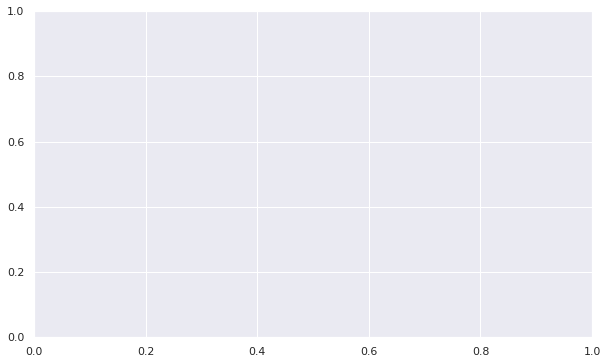

In [111]:
plt.figure(figsize=(10,6))
plt.bar(emp_sal_df,salary_df['salary'])
plt.xlabel('Job Title')
plt.ylabel('Average Salary ($)')
plt.title('Average Salary by Job Title',size=13)
plt.grid()
plt.savefig('Images/AvgSalarybyTitle.png')

NameError: ignored

TypeError: ignored